#### Motivation & Objective!
* Assisting builders on 
   - what kind of property to build 
   - What is the price range the property should be
   - What are the facility that sell the most


#### Importing necessary libraries and files

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

In [3]:
kclr = pd.read_csv('kc_4_LR')

In [4]:
kclr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
0,7129300520,12.309982,0.06250,0.066667,0.322166,0.295858,0.0,0.0,0.0,0.5,...,0.571498,0.217608,0.441342,0.300162,0.0,0.818182,0.400000,0.517241,0.000000,0.018880
1,6414100192,13.195614,0.06250,0.233333,0.538392,0.326644,0.4,0.0,0.0,0.5,...,0.908959,0.166113,0.525882,0.342058,0.0,1.000000,0.266667,0.551724,0.350877,0.060352
2,5631500400,12.100712,0.03125,0.066667,0.203585,0.366664,0.0,0.0,0.0,0.5,...,0.936143,0.237542,0.699256,0.349544,1.0,0.090909,0.800000,0.715517,0.000000,0.013382
3,2487200875,13.311329,0.09375,0.333333,0.463123,0.280700,0.0,0.0,0.0,1.0,...,0.586939,0.104651,0.446739,0.283185,0.0,1.000000,0.266667,0.431034,0.192982,0.069011
4,1954400510,13.142166,0.06250,0.200000,0.420302,0.340224,0.0,0.0,0.0,0.5,...,0.741354,0.393688,0.548854,0.339562,1.0,0.090909,0.566667,0.250000,0.122807,0.056678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.793859,0.06250,0.266667,0.394322,0.096366,0.8,0.0,0.0,0.5,...,0.874055,0.143688,0.489648,0.116777,0.0,0.363636,0.666667,0.051724,0.043860,0.036998
21593,6600060120,12.899220,0.09375,0.266667,0.508764,0.299385,0.4,0.0,0.0,0.5,...,0.570693,0.130399,0.554876,0.333836,1.0,0.090909,0.733333,0.017241,0.000000,0.042246
21594,1523300141,12.904459,0.03125,0.033333,0.281690,0.118318,0.4,0.0,0.0,0.5,...,0.705324,0.182724,0.341935,0.156392,0.0,0.454545,0.733333,0.051724,0.000000,0.042522
21595,291310100,12.899220,0.06250,0.266667,0.406749,0.189052,0.4,0.0,0.0,0.5,...,0.608975,0.373754,0.459892,0.094673,1.0,0.000000,0.500000,0.103448,0.035088,0.042246


In [5]:
kclr.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,13.048211,0.074162,0.215444,0.454795,0.339313,0.197639,0.007316,0.058353,0.602456,...,0.650142,0.253337,0.564866,0.344799,0.322962,0.506724,0.489582,0.382097,0.111996,0.060653
std,2.876736e+09,0.526555,0.028947,0.102531,0.117834,0.111875,0.215873,0.085221,0.191249,0.162636,...,0.222860,0.116880,0.119298,0.112877,0.467619,0.283187,0.287830,0.253252,0.192198,0.048198
min,1.000102e+06,11.264464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,12.682307,0.062500,0.166667,0.375546,0.281688,0.000000,0.000000,0.000000,0.500000,...,0.506997,0.158638,0.479997,0.285936,0.000000,0.272727,0.233333,0.163793,0.000000,0.032013
50%,3.904930e+09,13.017003,0.062500,0.233333,0.455945,0.332922,0.200000,0.000000,0.000000,0.500000,...,0.668972,0.239203,0.556861,0.341712,0.000000,0.454545,0.500000,0.353448,0.000000,0.048806
75%,7.308900e+09,13.377006,0.093750,0.266667,0.536222,0.374881,0.400000,0.000000,0.000000,0.750000,...,0.839794,0.327243,0.647535,0.380616,1.000000,0.727273,0.733333,0.551724,0.166667,0.074390
max,9.900000e+09,15.856731,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking correlation with heat map
Correlation matrix :we know, linear and logistic regression do not handle highly correlated input variables well.
First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values
we will do Scatterplot matrix In some cases, we may want to plot a scatterplot matrix such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

In [6]:
kclr.drop(['id','day'],axis=1,inplace=True)

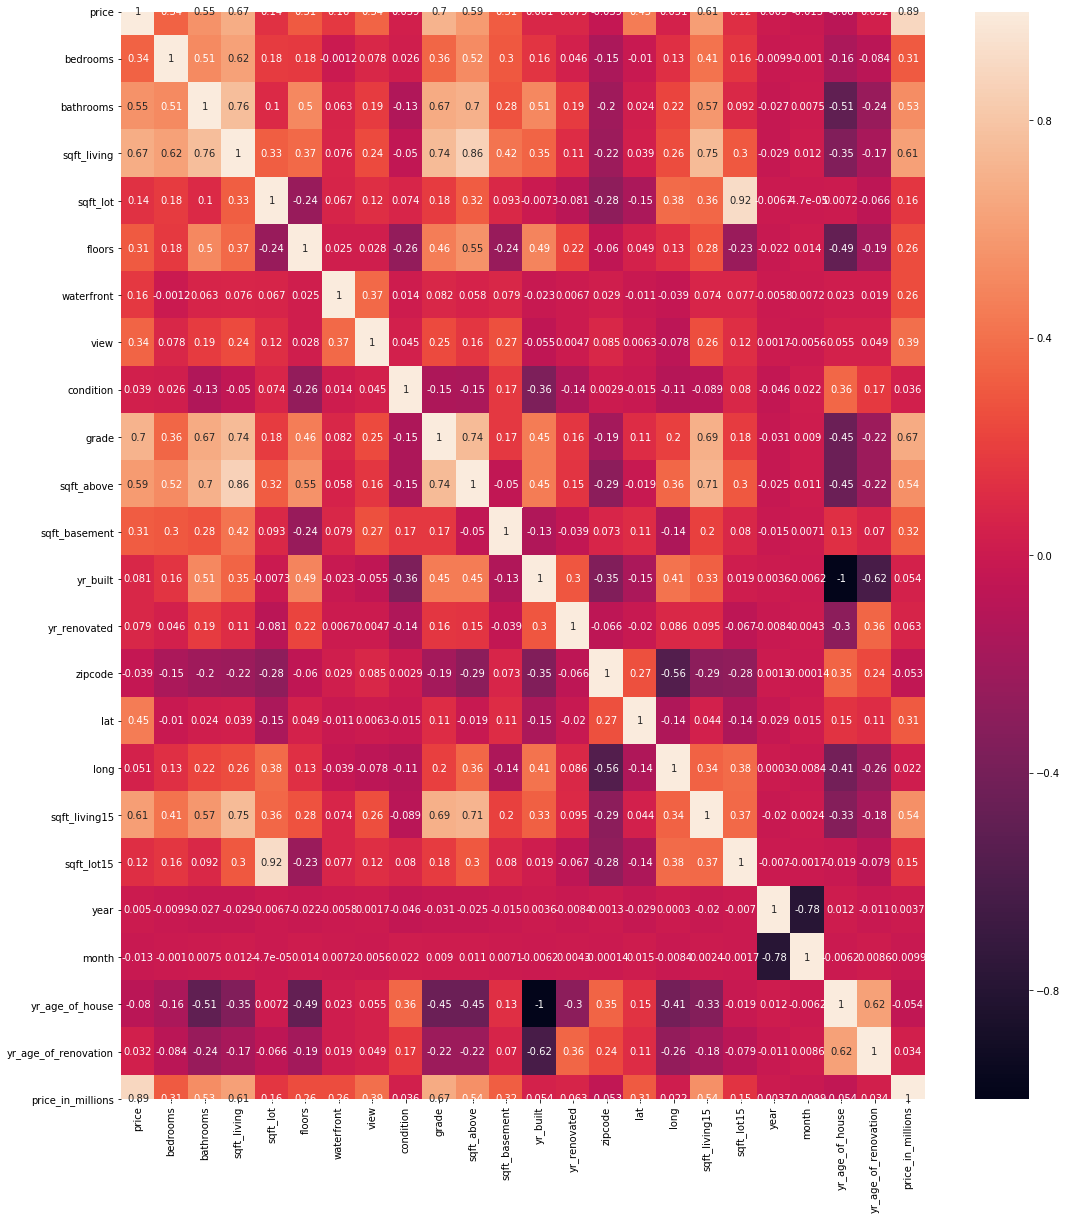

In [7]:
plt.figure(figsize=(18,20))
sns.heatmap(kclr.corr(),annot=True )

#### Creating plot for select variable in comparison with price in millions

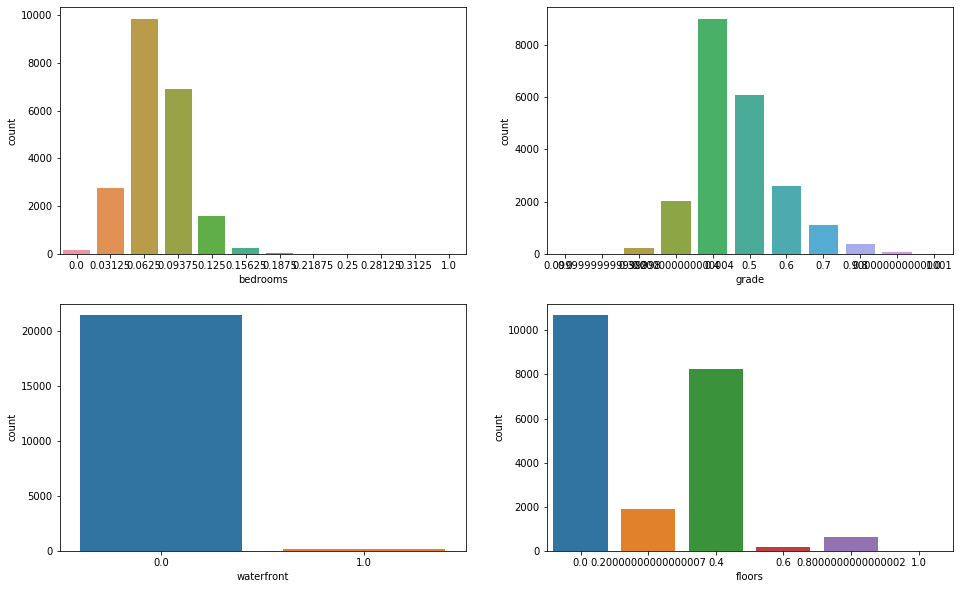

In [43]:
fig = plt.figure(figsize=(16,10))
fig.add_subplot(2,2,1)
sns.countplot(kclr['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(kclr['grade'])
fig.add_subplot(2,2,3)
sns.countplot(kclr['waterfront'])
fig.add_subplot(2,2,4)
sns.countplot(kclr['floors'])

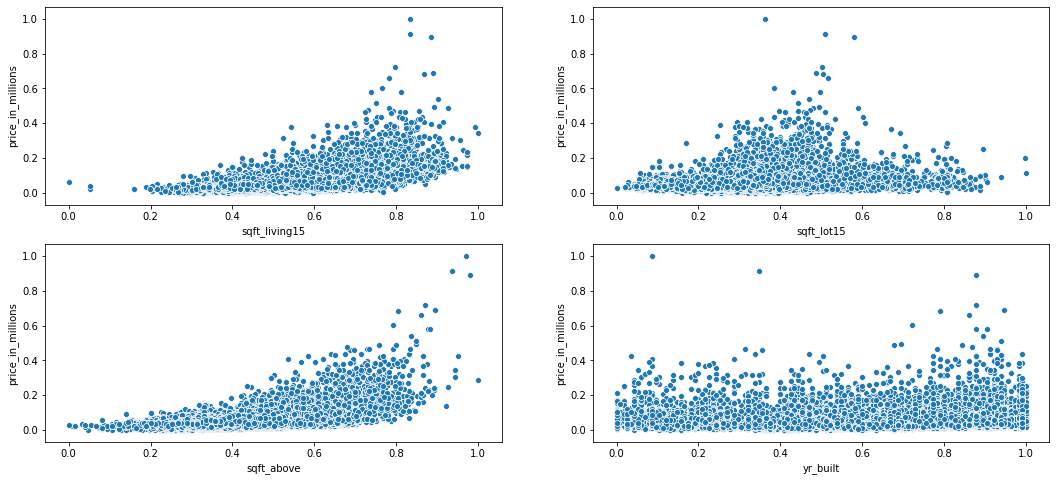

In [9]:
fig = plt.figure(figsize=(18,8))
fig.add_subplot(2,2,1)
sns.scatterplot(kclr['sqft_living15'], kclr.price_in_millions)
fig.add_subplot(2,2,2)
sns.scatterplot(kclr['sqft_lot15'],kclr.price_in_millions)
fig.add_subplot(2,2,3)
sns.scatterplot(kclr['sqft_above'],kclr.price_in_millions)
fig.add_subplot(2,2,4)
sns.scatterplot(kclr['yr_built'],kclr.price_in_millions) 

#### Checking Value counts for year built for checking the occurance with respect to the property being built

In [10]:
pd.value_counts(kclr.yr_built) 

0.991304    559
0.921739    453
0.913043    450
0.904348    433
0.895652    420
           ... 
0.286957     30
0.008696     29
0.017391     27
0.304348     24
0.295652     21
Name: yr_built, Length: 116, dtype: int64

#### Checking Distribution


 mu = 0.06 and sigma = 0.05



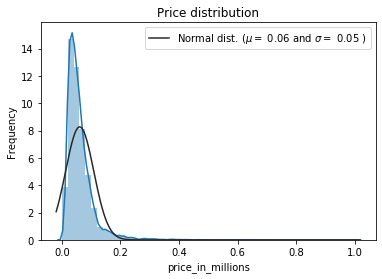

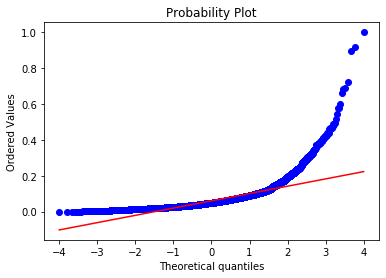

In [11]:
sns.distplot(kclr['price_in_millions'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(kclr['price_in_millions'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) # standard deviation

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(kclr['price_in_millions'], plot=plt)
plt.show() 

The price is right skewed, Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.
To have more understanding about the data i will select the features that are more corrolated to the Price so i can view them

#### Checking and working on correlation

In [12]:
cor = kclr.corr()
cor[cor['price_in_millions']<0.05].index

Index(['condition', 'zipcode', 'long', 'year', 'month', 'yr_age_of_house',
       'yr_age_of_renovation'],
      dtype='object')

In [13]:
cor = kclr.corr()
cor[cor['price_in_millions']>0.3].index

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15',
       'price_in_millions'],
      dtype='object')

In [14]:
kclr1=kclr[['price_in_millions', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade','sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]

In [15]:
kclr1.head() 

,price_in_millions,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,0.018880,0.06250,0.066667,0.322166,0.0,0.4,0.358392,0.000000,0.571498,0.441342
1,0.060352,0.06250,0.233333,0.538392,0.0,0.4,0.546652,0.082988,0.908959,0.525882
2,0.013382,0.03125,0.066667,0.203585,0.0,0.3,0.226478,0.000000,0.936143,0.699256
3,0.069011,0.09375,0.333333,0.463123,0.0,0.4,0.322322,0.188797,0.586939,0.446739
4,0.056678,0.06250,0.200000,0.420302,0.0,0.5,0.467563,0.000000,0.741354,0.548854


#### Checking relationship between variables with pair plots

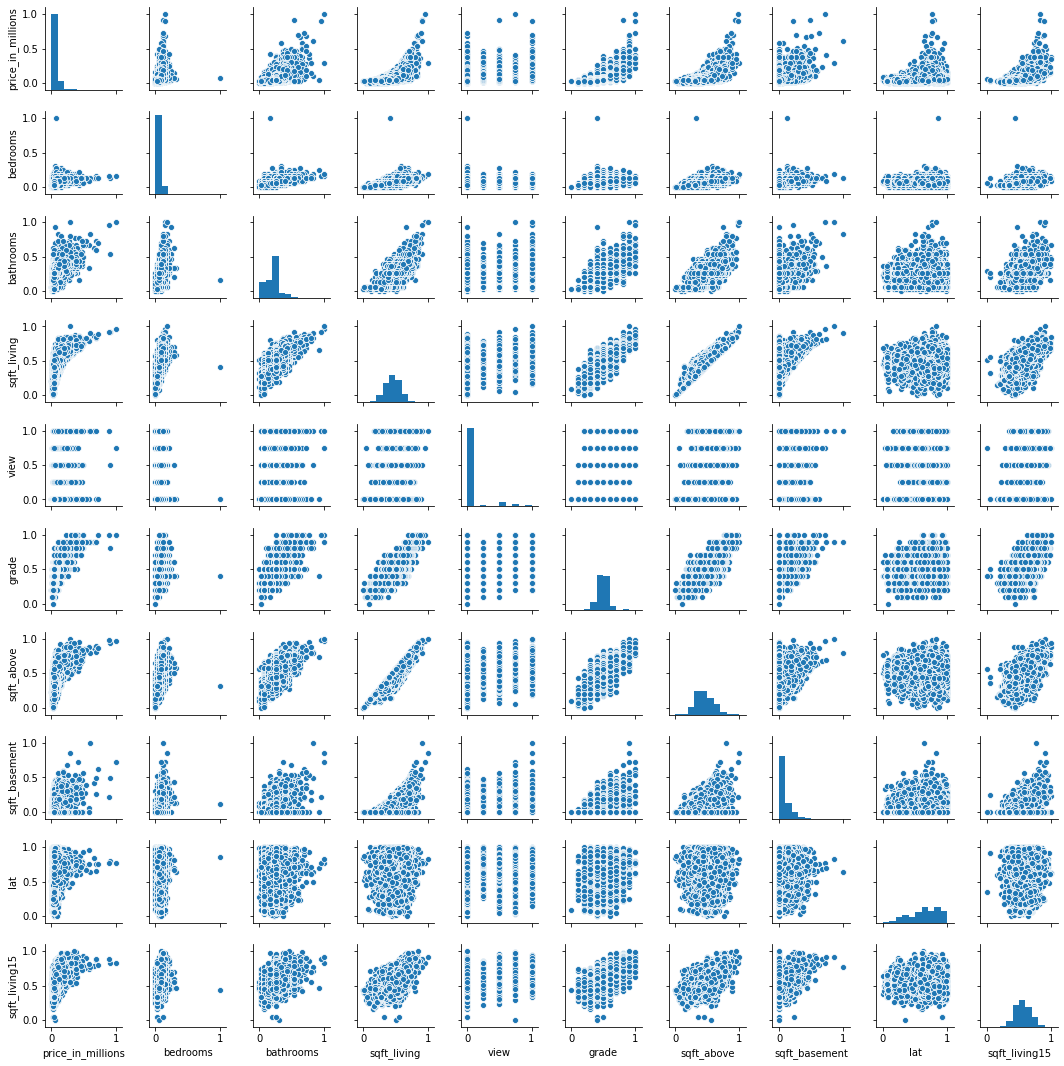

In [27]:
sns.pairplot(kclr1, diag_kind="hist", height=1.5)  

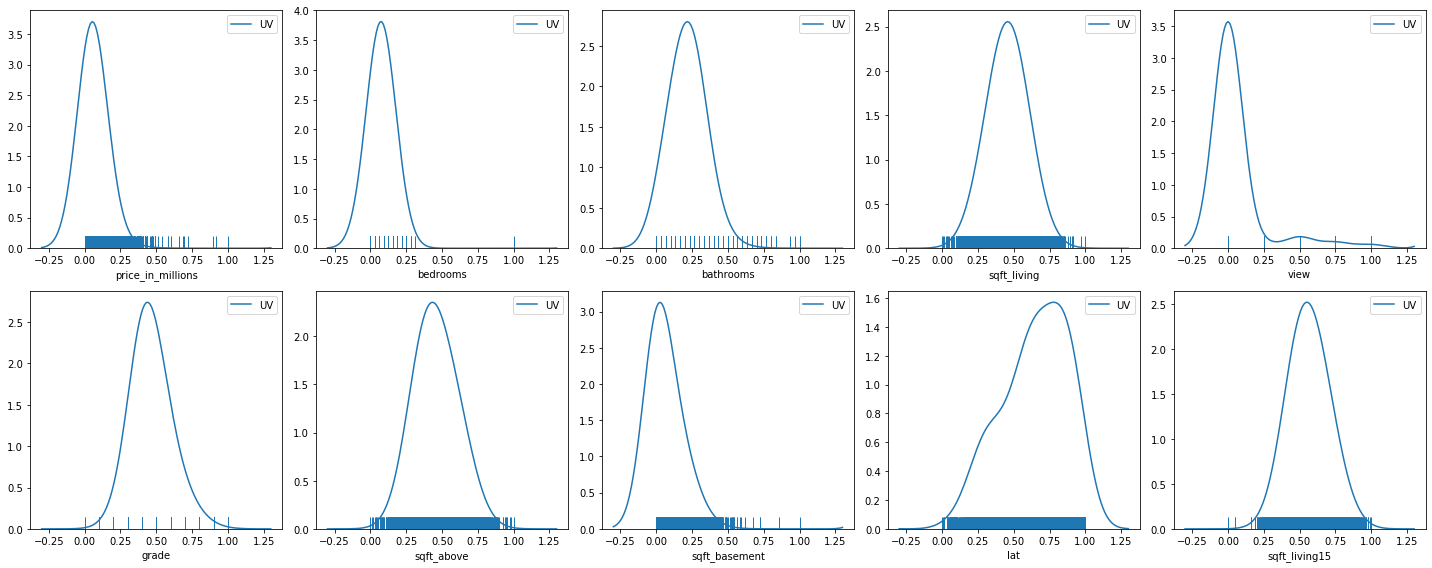

In [28]:
num_cols = kclr1.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,8))

for col in range(len(num_cols.columns)):
    fig.add_subplot(2,5,col+1)
    sns.distplot(num_cols.iloc[:,col], hist=False, rug=True, kde_kws={'bw':0.1}, label='UV')
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()

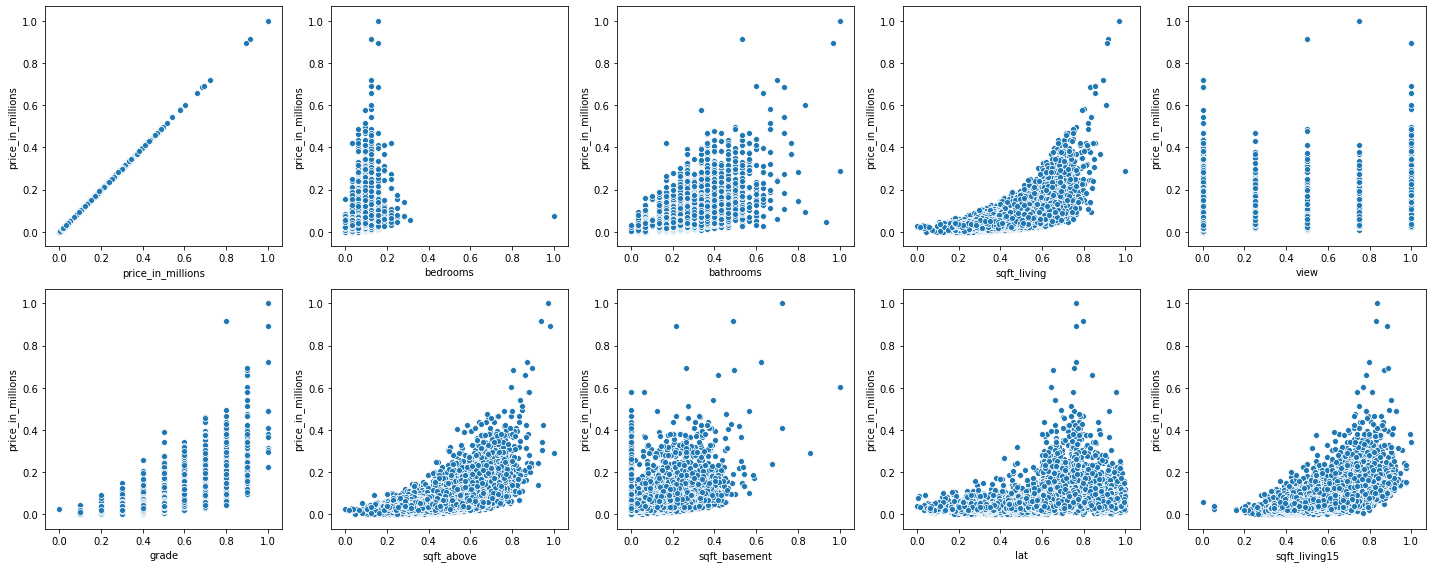

In [29]:
num_cols = kclr1.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,8))

for col in range(len(num_cols.columns)):
    fig.add_subplot(2,5,col+1)
    sns.scatterplot(x=num_cols.iloc[:,col], y=kclr1['price_in_millions'])
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\seaborn\regression.py:282: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]


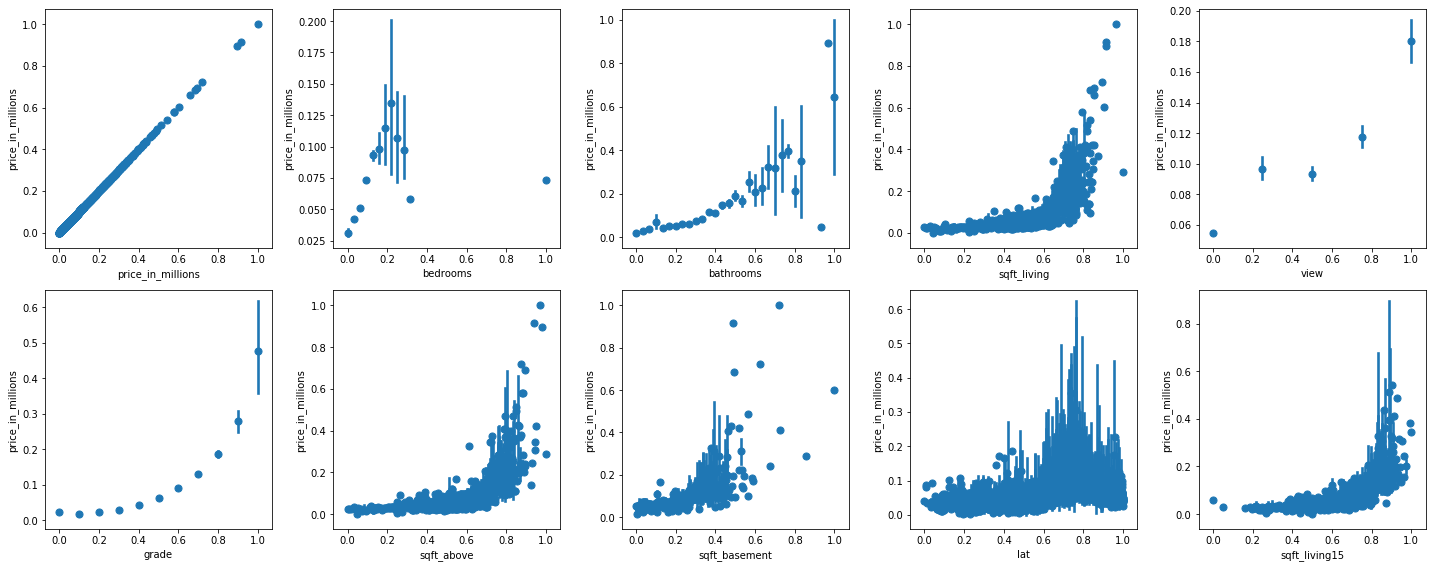

In [30]:
num_cols = kclr1.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,8))

for col in range(len(num_cols.columns)):
    fig.add_subplot(2,5,col+1)
    sns.regplot(x=num_cols.iloc[:,col], y=kclr1['price_in_millions'],x_estimator=np.mean, logx=True)
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()

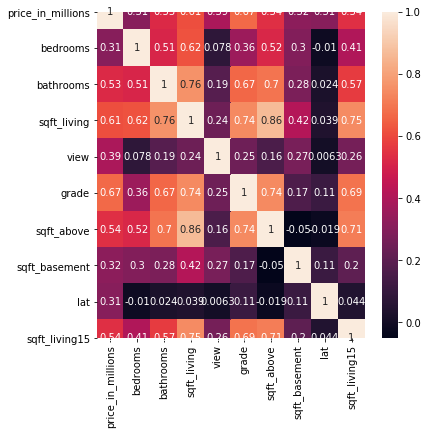

In [31]:
plt.figure(figsize=(6,6))
sns.heatmap(kclr1.corr(), annot=True) 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [33]:
X = kclr1.drop(['price_in_millions'], axis=1)
y = kclr1['price_in_millions']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
log_clf=LinearRegression()
rnd_clf = RandomForestRegressor()
gbr_clf=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.1, max_depth=4, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')
xgb_clf=XGBRegressor(n_estimators=3000) 

In [36]:
X.head() 

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,0.06250,0.066667,0.322166,0.0,0.4,0.358392,0.000000,0.571498,0.441342
1,0.06250,0.233333,0.538392,0.0,0.4,0.546652,0.082988,0.908959,0.525882
2,0.03125,0.066667,0.203585,0.0,0.3,0.226478,0.000000,0.936143,0.699256
3,0.09375,0.333333,0.463123,0.0,0.4,0.322322,0.188797,0.586939,0.446739
4,0.06250,0.200000,0.420302,0.0,0.5,0.467563,0.000000,0.741354,0.548854


In [37]:
voting_clf = VotingRegressor([('lr', log_clf), ('rnd', rnd_clf),  ('gbr', gbr_clf),('xbg', xgb_clf)])
voting_clf.fit(X_train, y_train)

[08:46:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('lr',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('rnd',
                             RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                

In [38]:
for clf in (log_clf, rnd_clf,voting_clf, gbr_clf,xgb_clf):
    clf.fit(X_train, y_train)
    k = X_test.shape[1]
    n = len(X_test)
    y_predition = clf.predict(X_test)
    RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predition)) , '.3f'))
    MSE = mean_squared_error(y_test, y_predition).round(3)
    MAE = mean_absolute_error(y_test, y_predition).round(3)
    r2 = r2_score(y_test, y_predition).round(3)
    adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
    MAPE = np.mean( np.abs((y_test - y_predition) /y_test ) ) * 100
    print(clf.__class__.__name__, '\nr2_score', r2, '\nRMSE =',RMSE, '\nMSE =',MSE, 
          '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =',MAPE, '%')


LinearRegression 
r2_score 0.598 
RMSE = 0.03 
MSE = 0.001 
MAE = 0.018 
R2 = 0.598 
Adjusted R2 = 0.5971605568445475 
Mean Absolute Percentage Error = 37.051221507742724 %
RandomForestRegressor 
r2_score 0.753 
RMSE = 0.024 
MSE = 0.001 
MAE = 0.013 
R2 = 0.753 
Adjusted R2 = 0.752484222737819 
Mean Absolute Percentage Error = 24.6316591787097 %
[08:47:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
VotingRegressor 
r2_score 0.775 
RMSE = 0.022 
MSE = 0.001 
MAE = 0.012 
R2 = 0.775 
Adjusted R2 = 0.7745301624129931 
Mean Absolute Percentage Error = 23.47102302508863 %
GradientBoostingRegressor 
r2_score 0.78 
RMSE = 0.022 
MSE = 0.0 
MAE = 0.012 
R2 = 0.78 
Adjusted R2 = 0.7795406032482599 
Mean Absolute Percentage Error = 23.0242526039993 %
[08:48:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 
r2_score 0.778 
RMSE = 0.022 
MSE = 0.0 
MAE = 0.012 
R2

In [39]:
import sklearn.preprocessing as pp 

In [40]:
X2 = pp.PolynomialFeatures(include_bias=False).fit_transform(X) 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.22, random_state=42)

In [42]:
voting_clf = VotingRegressor([('lr', log_clf), ('rnd', rnd_clf),  ('gbr', gbr_clf),('xbg', xgb_clf)])
voting_clf.fit(X_train, y_train)

[08:49:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('lr',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('rnd',
                             RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                

#### Recomendation :
- There has to be property high in the grading system of Kings county
- The property has to be uniform with the neighbour 
- Higher Square footage does not equate to higher prices or profit after surpassing certain size 
- Price range of house between 100k  and 200k sell the most